I’ve found a website that has over 1700 reviews of chocolate bars from all around the world.
The data is displayed in a table, instead of in a csv or json. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5. A 1 is “unpleasant” chocolate, while a 5 is a bar that transcends “beyond the ordinary limits”.

Some questions we thought about when we found this dataset were: Where are the best cocoa beans grown? Which countries produce the highest-rated bars? What’s the relationship between cocoa solids percentage and rating?

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Let’s make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

In [9]:
url = "https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html"
webpage = requests.get(url)
html = webpage.content
soup = BeautifulSoup(html,"html.parser")

In [11]:
print(soup.head())

[<meta charset="utf-8"/>, <style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>]



How many terrible chocolate bars are out there? And how many earned a perfect 5? Let’s make a histogram of this data.

The first thing to do is to put all of the ratings into a list.

I will Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

As we do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later

In [13]:
all_ratings_tag = soup.find_all(attrs={"class": "Rating"})

In [15]:
ratings = []

In [16]:
for tag in all_ratings_tag[1:]:
  ratings.append(float(tag.get_text()))


Using Matplotlib, I will create a histogram of the ratings values:

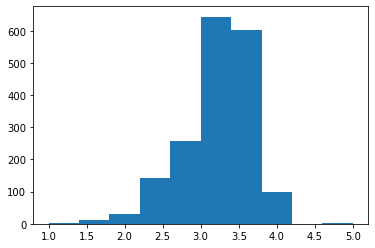

In [20]:
plt.hist(ratings)
plt.show()


We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a groupby to find the ones with the highest average rating.

In [24]:
Names_Of_Company = soup.select(".Company")
Company_Names = []

In [50]:
for name in Names_Of_Company[1:]:
  Company_Names.append(name.get_text())

I will now Create a DataFrame with a column “Company” corresponding to our companies list, and a column “Ratings” corresponding to our ratings list.

In [30]:
d = {"Company":Company_Names , "Rating": ratings}
df = pd.DataFrame.from_dict(d)

In [31]:
print(df)

       Company  Rating
0     A. Morin    3.75
1     A. Morin    2.75
2     A. Morin    3.00
3     A. Morin    3.50
4     A. Morin    3.50
...        ...     ...
1790    Zotter    3.75
1791    Zotter    3.00
1792    Zotter    3.50
1793    Zotter    3.25
1794    Zotter    3.00

[1795 rows x 2 columns]



By Using .groupby to group our DataFrame by Company and take the average of the grouped ratings.

Then, we will use the .nlargest command to get the 10 highest rated chocolate companies. and Print them out

In [33]:
Company_Ratings_Groupby = df.groupby('Company').Rating.mean()
print(Company_Ratings_Groupby)


Company
A. Morin                  3.380435
AMMA                      3.500000
Acalli                    3.750000
Adi                       3.250000
Aequare (Gianduja)        2.875000
                            ...   
hello cocoa               3.125000
hexx                      3.050000
iQ Chocolate              2.875000
organicfair               2.850000
twenty-four blackbirds    3.041667
Name: Rating, Length: 416, dtype: float64


In [34]:
TOP_TEN = Company_Ratings_Groupby.nlargest(10)
print(TOP_TEN)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacao to be better than those with lower levels of cacao.

It looks like the cocoa percentages are in the table under the Cocoa Percent column.

Using the same methods we used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as an integer, after stripping off the % character.

In [44]:
cocoa_percents = []
cocoa_percents_tags = soup.select('.CocoaPercent')
for td in cocoa_percents_tags[1:]:
  percent = float(td.get_text().strip('%'))
  cocoa_percents.append(percent)




We will now make a new DataFrame to add the CocoaPercentage Column

In [46]:

d2 = {"Company":Company_Names , "Rating": ratings,"CocoaPercentage":cocoa_percents}
df2 = pd.DataFrame.from_dict(d2)

In [47]:
print(df2)

       Company  Rating  CocoaPercentage
0     A. Morin    3.75             63.0
1     A. Morin    2.75             70.0
2     A. Morin    3.00             70.0
3     A. Morin    3.50             70.0
4     A. Morin    3.50             70.0
...        ...     ...              ...
1790    Zotter    3.75             70.0
1791    Zotter    3.00             65.0
1792    Zotter    3.50             65.0
1793    Zotter    3.25             62.0
1794    Zotter    3.00             65.0

[1795 rows x 3 columns]



I will nowMake a scatterplot of ratings (your_df.Rating) vs percentage of cocoa (your_df.CocoaPercentage).


Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

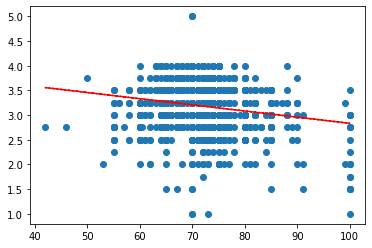

In [49]:
plt.scatter(df2.CocoaPercentage, df2.Rating)
z = np.polyfit(df2.CocoaPercentage, df2.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df2.CocoaPercentage, line_function(df2.CocoaPercentage), "r--")
plt.show()